In [7]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import numpy as np
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE

nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# -------------------------
# 1. Load Your Data
# -------------------------
with open("C:\\Users\\snehal.gunde\\Desktop\\tfidf+LR_Final\\data\\training_data.json", "r") as f:
    data = json.load(f)

df = pd.DataFrame(data)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\snehal.gunde\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\snehal.gunde\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
import os
file_path = os.path.abspath("data/training_data.json")
print(file_path)

c:\Users\snehal.gunde\Desktop\tfidf+LR_Final\data\training_data.json


In [8]:
df.head()

,user_input,intent
0,hi,greeting
1,hello,greeting
2,hey,greeting
3,good morning,greeting
4,good evening,greeting


C:\Users\snehal.gunde\AppData\Local\Temp\ipykernel_26088\222116802.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='intent', order=df['intent'].value_counts().index, palette='viridis')


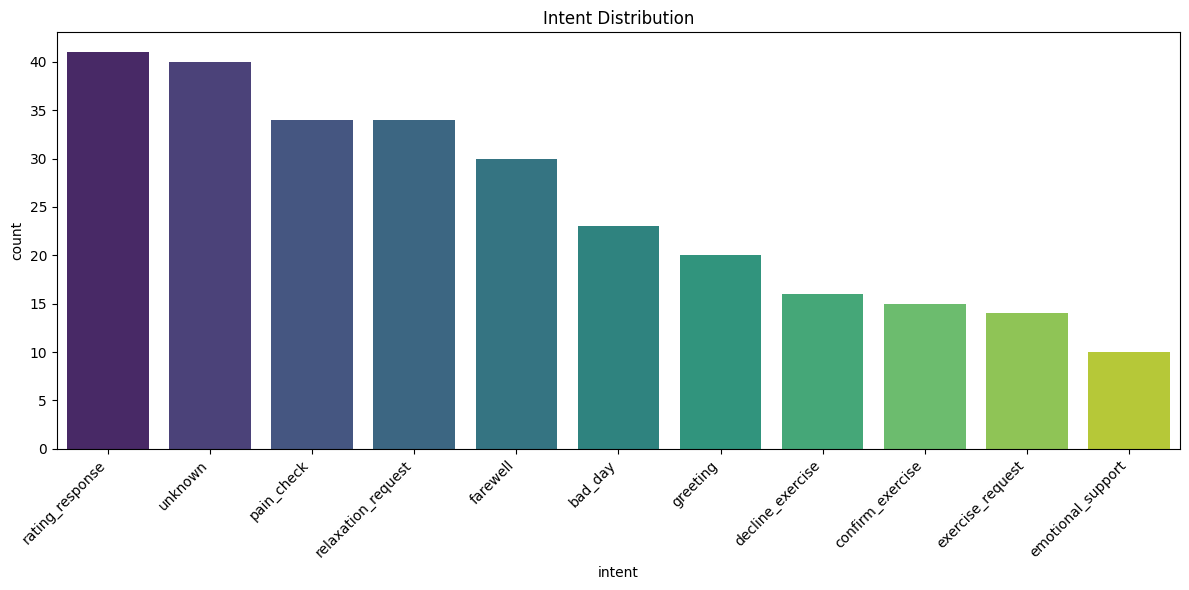

In [9]:

# -------------------------
# 2. Class Distribution
# -------------------------
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='intent', order=df['intent'].value_counts().index, palette='viridis')
plt.title("Intent Distribution")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


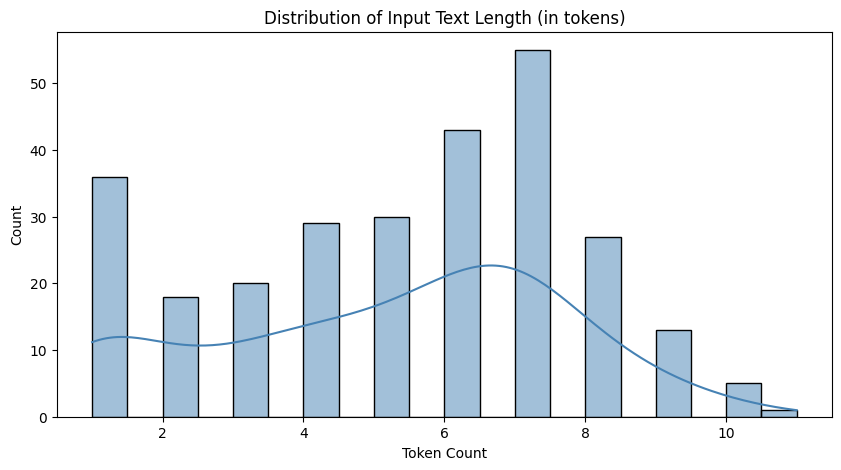

In [10]:

# -------------------------
# 3. Text Length Distribution
# -------------------------
df["length_tokens"] = df["user_input"].apply(lambda x: len(word_tokenize(x)))
plt.figure(figsize=(10, 5))
sns.histplot(df["length_tokens"], bins=20, kde=True, color='steelblue')
plt.title("Distribution of Input Text Length (in tokens)")
plt.xlabel("Token Count")
plt.show()


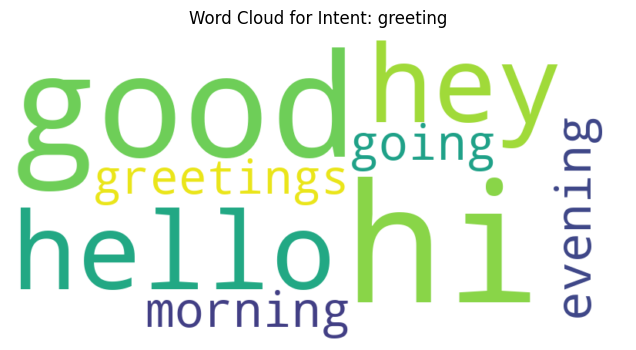

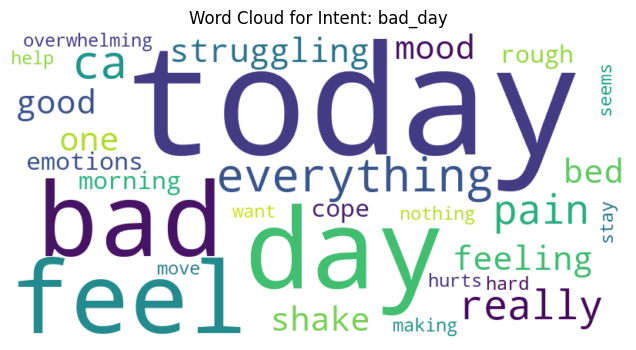

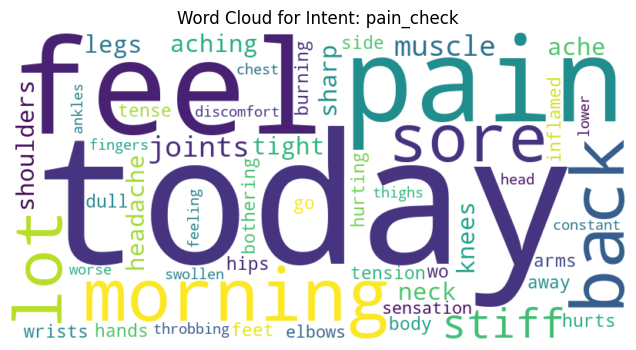

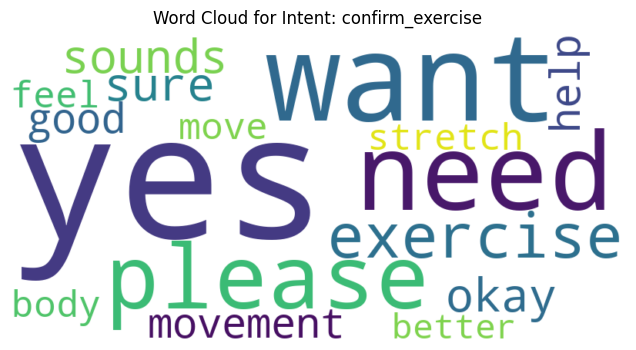

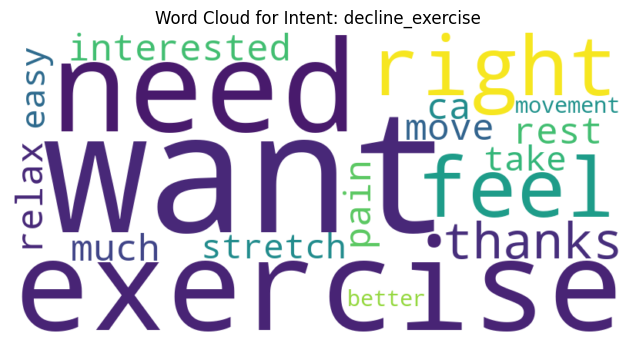

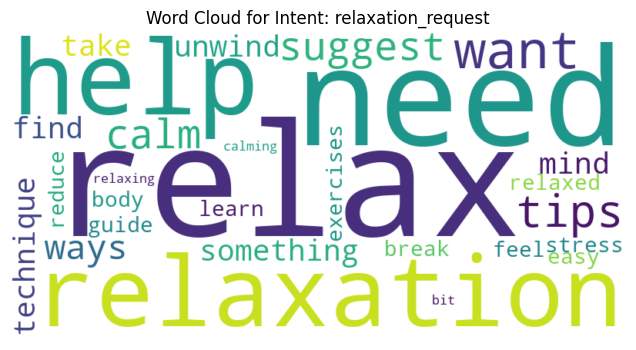

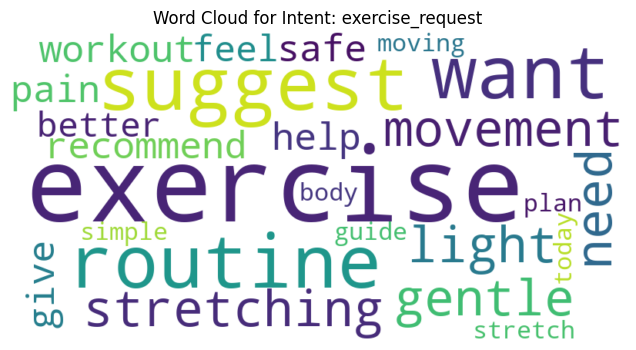

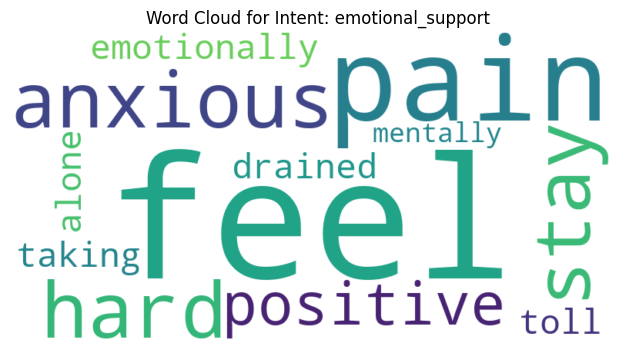

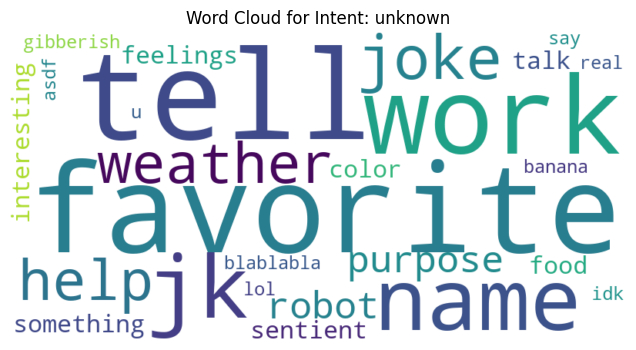

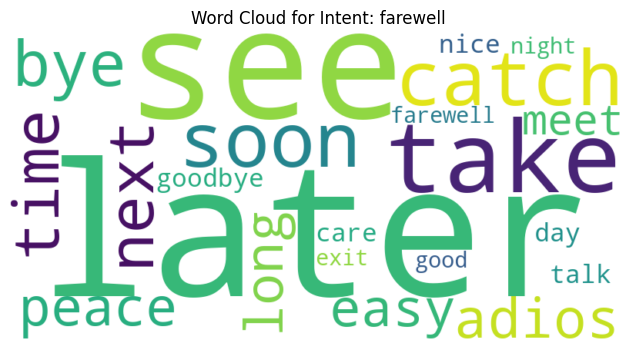

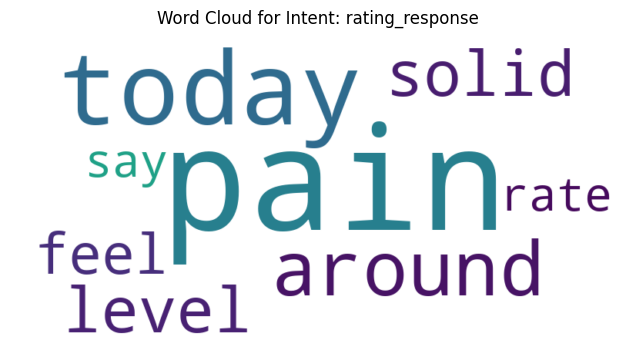

In [11]:

# -------------------------
# 4. Word Cloud per Intent
# -------------------------
stop_words = set(stopwords.words('english'))
for intent in df['intent'].unique():
    text = " ".join(df[df['intent'] == intent]['user_input'].tolist())
    tokens = [word for word in word_tokenize(text.lower()) if word.isalpha() and word not in stop_words]
    wc = WordCloud(width=800, height=400, background_color='white').generate(" ".join(tokens))
    
    plt.figure(figsize=(8, 4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Intent: {intent}")
    plt.show()


C:\Users\snehal.gunde\AppData\Local\Temp\ipykernel_26088\4082427176.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_words.keys()), y=list(top_words.values()), palette="mako")


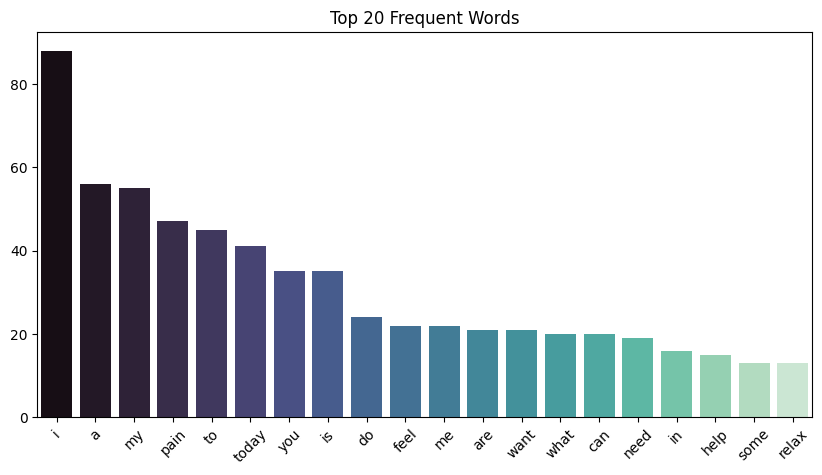

In [12]:

# -------------------------
# 5. Top Words Overall
# -------------------------
all_words = [word for sentence in df['user_input'] for word in word_tokenize(sentence.lower()) if word.isalpha()]
word_freq = Counter(all_words)
top_words = dict(word_freq.most_common(20))

plt.figure(figsize=(10, 5))
sns.barplot(x=list(top_words.keys()), y=list(top_words.values()), palette="mako")
plt.xticks(rotation=45)
plt.title("Top 20 Frequent Words")
plt.show()


In [ ]:

# -------------------------
# 5. Top Words Overall
# -------------------------
all_words = [word for sentence in df['user_input'] for word in word_tokenize(sentence.lower()) if word.isalpha()]
word_freq = Counter(all_words)
top_words = dict(word_freq.most_common(20))

plt.figure(figsize=(10, 5))
sns.barplot(x=list(top_words.keys()), y=list(top_words.values()), palette="mako")
plt.xticks(rotation=45)
plt.title("Top 20 Frequent Words")
plt.show()

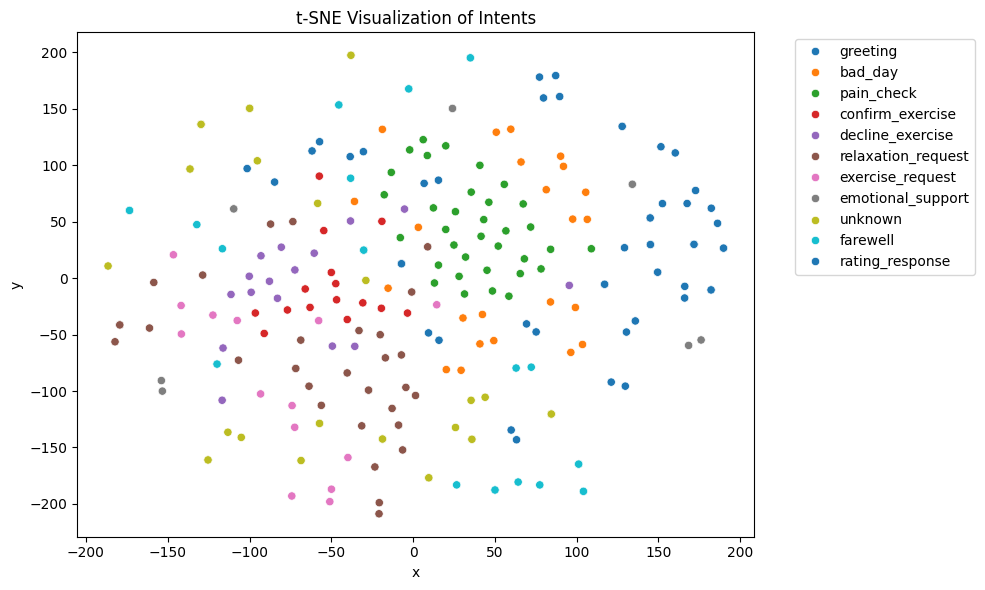

In [13]:

# -------------------------
# 6. TF-IDF + t-SNE for Visual Clustering
# -------------------------
tfidf = TfidfVectorizer(max_features=500)
X_tfidf = tfidf.fit_transform(df['user_input'])

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_embedded = tsne.fit_transform(X_tfidf.toarray())

tsne_df = pd.DataFrame(X_embedded, columns=['x', 'y'])
tsne_df['intent'] = df['intent']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df, x='x', y='y', hue='intent', palette='tab10')
plt.title("t-SNE Visualization of Intents")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


C:\Users\snehal.gunde\AppData\Local\Temp\ipykernel_26088\4254699485.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[' '.join(bg) for bg, _ in bigram_freq], y=[count for _, count in bigram_freq], palette="crest")


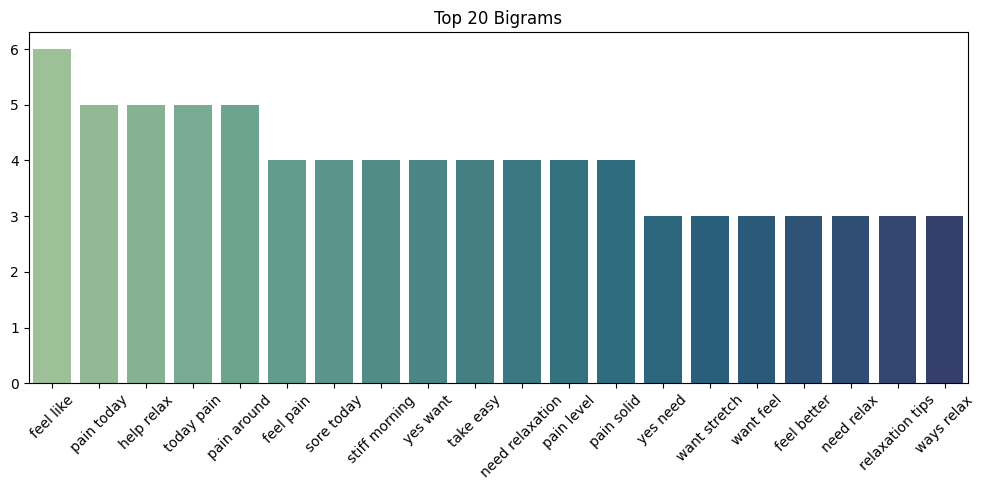

C:\Users\snehal.gunde\AppData\Local\Temp\ipykernel_26088\4254699485.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[' '.join(tg) for tg, _ in trigram_freq], y=[count for _, count in trigram_freq], palette="flare")


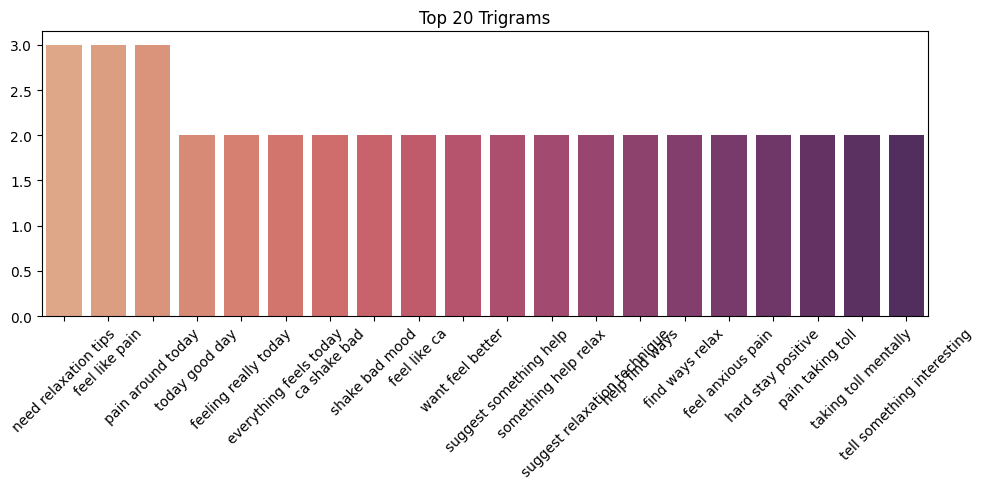

In [16]:
from nltk.util import ngrams
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))

def generate_ngrams(text, n):
    tokens = [word.lower() for word in word_tokenize(text) if word.isalpha() and word.lower() not in stop_words]
    return list(ngrams(tokens, n))

all_bigrams = [bg for text in df['user_input'] for bg in generate_ngrams(text, 2)]
all_trigrams = [tg for text in df['user_input'] for tg in generate_ngrams(text, 3)]

# Count top ngrams
bigram_freq = Counter(all_bigrams).most_common(20)
trigram_freq = Counter(all_trigrams).most_common(20)

# Plot bigrams
plt.figure(figsize=(10, 5))
sns.barplot(x=[' '.join(bg) for bg, _ in bigram_freq], y=[count for _, count in bigram_freq], palette="crest")
plt.xticks(rotation=45)
plt.title("Top 20 Bigrams")
plt.tight_layout()
plt.show()

# Plot trigrams
plt.figure(figsize=(10, 5))
sns.barplot(x=[' '.join(tg) for tg, _ in trigram_freq], y=[count for _, count in trigram_freq], palette="flare")
plt.xticks(rotation=45)
plt.title("Top 20 Trigrams")
plt.tight_layout()
plt.show()
